# Bayesian Normal Mean Model

The Bayesian normal mean model treats the **unknown** mean parameter as a **normally distributed** random variable reflecting our **uncertainty**, then updates this normal distribution by **conditioning on observed data** to yield a posterior normal distribution with **reduced uncertainty**.

# Graphical Summary

![Fig](./graphical_summary/slides/Slide26.png)

# Key Formula

Under the Bayesian regression setting, we have

$$
\mathbf{Y} = \mathbf{X} \beta + \boldsymbol{\varepsilon}, \quad \boldsymbol{\varepsilon} \sim \mathcal{N}(0, \sigma^2 \mathbf{I})
$$

where we place a **prior distribution** on the regression coefficient: $\beta \sim \mathcal{N}(\beta_0, \sigma_0^2)$.

- $ \mathbf{Y} \in \mathbb{R}^{N \times 1} $: phenotype vector
- $ \mathbf{X} \in \mathbb{R}^{N \times 1} $: genotype vector (e.g., 0, 1, 2 for additive coding)
- $ \beta \in \mathbb{R} $: a scalar, genetic effect size (regression coefficient)
- $ \boldsymbol{\varepsilon} \in \mathbb{R}^{N \times 1} $: residual error, assumed i.i.d. Gaussian

# Technical Details

## The Bayesian Perspective: Uncertainty as Random Variables

In Bayesian statistics, parameters are not fixed unknown constants but **random variables representing our uncertainty**. This fundamental shift occurs because we recognize that we can never condition on everything that might influence a parameter's true value.

**Key insight**: When we cannot condition on something (because it's unobserved or unknown), we treat it as a random variable with a probability distribution that quantifies our uncertainty.

## Model Assumptions

In the Bayesian normal mean model, we treat uncertainty systematically by making everything we cannot fully condition on into a random variable:

$$
Y_i \sim \mathcal{N}(X_i\beta, \sigma^2) \quad \text{for } i = 1, 2, \ldots, N
$$

where:
- $\beta$ is **not** a fixed unknown constant, but a **random variable** representing our uncertainty about the genetic effect
- $\sigma^2$ is the known variance (we condition on this)
- $X_i$ is the genotype value (fixed and observed - we condition on this)

The key insight: **Since we cannot condition on the true value of $\beta$ (we don't know it), we treat it as random.**

## Prior Distribution: Quantifying Our Uncertainty

Since we cannot condition on the true value of $\beta$, we express our uncertainty through a probability distribution:

$$
\beta \sim \mathcal{N}(\beta_0, \sigma_0^2)
$$

This prior distribution represents:
- $\beta_0$: Our best guess about the effect (what we'd expect if we had no data)
- $\sigma_0^2$: How uncertain we are about this guess (larger variance = more uncertainty)

**Key insight**: This isn't saying $\beta$ "is random" in nature - it's saying **our knowledge about $\beta$ is uncertain** because we cannot condition on everything that determines the true effect.

The probability density function reflects this uncertainty:

$$
p(\beta) \propto \exp\left(-\frac{(\beta - \beta_0)^2}{2\sigma_0^2}\right)
$$

## Likelihood: What We Can Condition On

The likelihood represents what we **can** condition on - the observed data given our uncertain parameter:

$$
Y_i\mid\beta, \sigma^2 \sim \mathcal{N}(X_i\beta, \sigma^2) \quad \text{for } i = 1, 2, \ldots, N
$$

For all observations, the likelihood is:

$$
p(\mathbf{Y}\mid\beta) \propto \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^N (Y_i - X_i\beta)^2\right)
$$

This says: "If we knew $\beta$ (could condition on it), this is how likely our data would be."

## Posterior Distribution: Conditioning on Everything Available

Using Bayes' theorem, we condition on all available information (the observed data) to update our uncertainty:

$$
p(\beta|\mathbf{Y}) \propto p(\mathbf{Y}|\beta) p(\beta)
$$

**This is the essence of Bayesian thinking**: Start with our uncertainty (prior), observe data, then update our uncertainty by conditioning on what we've learned.

The posterior distribution follows a normal distribution:

$$
\beta \mid \mathbf{Y} \sim \mathcal{N}\left( \beta_1, \sigma_1^2 \right)
$$

where the parameters are:

$$
\beta_1 = \frac{\frac{1}{\sigma^2} \sum_{i=1}^N X_i Y_i + \frac{1}{\sigma_0^2} \beta_0}{\frac{1}{\sigma^2} \sum_{i=1}^N X_i^2 + \frac{1}{\sigma_0^2}}, \quad \sigma_1^2 = \frac{1}{\frac{1}{\sigma^2} \sum_{i=1}^N X_i^2 + \frac{1}{\sigma_0^2}}
$$

Notice: $\sigma_1^2 < \sigma_0^2$ always - **conditioning on data reduces our uncertainty**.

### Interpretation as Weighted Average

The posterior mean can be rewritten as a **weighted average** of what we knew before (prior) and what we learned from data:

$$
\beta_1 = w \cdot \frac{T_2}{T_1} + (1-w) \cdot \beta_0
$$

where: $w = \frac{\frac{T_1}{\sigma^2}}{\frac{T_1}{\sigma^2} + \frac{1}{\sigma_0^2}}$

This shows how conditioning works in practice:

- **More data** or **lower measurement error** (small $\sigma^2$ or large $T_1$): $w \approx 1$, we trust the data more
- **More prior uncertainty** (large $\sigma_0^2$): $w \approx 1$, we let data dominate since our prior was vague
- **Less prior uncertainty** (small $\sigma_0^2$): $w \approx 0$, we stick closer to our prior beliefs
- **Equal information** ($\frac{T_1}{\sigma^2} = \frac{1}{\sigma_0^2}$): $w = 0.5$, equal weighting

where $T_1 = \sum_{i=1}^N X_i^2$ and $T_2 = \sum_{i=1}^N X_i Y_i$ are the sufficient statistics.

## Why This Makes Sense

**Traditional thinking**: "What's the true value of this parameter?"  
**Bayesian thinking**: "What's our uncertainty about this parameter (because we can never condition on everything that determines it), and how does new information update that uncertainty?"

This framework naturally handles situations where multiple sources of uncertainty exist, and where we want to systematically combine prior knowledge with observed data. The mathematical machinery ensures that conditioning on observed information always reduces uncertainty in a coherent way.

# Related Topics

- [ordinary least squares](https://statfungen.github.io/statgen-primer/ordinary_least_squares.html)
- [summary statistics](https://statfungen.github.io/statgen-primer/summary_statistics.html)
- [likelihood](https://statfungen.github.io/statgen-primer/likelihood.html)
- [maximum likelihood estimation](https://statfungen.github.io/statgen-primer/maximum_likelihood_estimation.html)

# Example

Imagine you're studying genetic effects across many variants. You don't know the true effect size for any particular variant, but you have some intuition: **most genetic effects are probably small, some are moderate, and very few are large**.

This is fundamentally different from asking "Is the effect exactly 0, 0.5, or 1.0?" (which assumes a fixed effect) Instead, we're saying: **"The true effect itself is uncertain - it's a random quantity drawn from some distribution."**

This leads us naturally to a **hierarchical model**:

1. **Level 1 (Data)**: Each person's phenotype depends on their genotype and the true effect
2. **Level 2 (Effect)**: The true effect is itself random, drawn from a distribution
3. **Level 3 (Hyperparameters)**: The parameters of that distribution are learned from data

This example shows how to implement a **Bayesian normal mean model**, where we treat $\beta$ as a continuous parameter with a prior distribution. Instead of probabilities for just three specific values, we get a complete posterior distribution showing how plausible every possible effect size is after combining our prior knowledge with the data.

$$
\begin{align}
Y_i | \beta, \sigma^2 &\sim \mathcal{N}(X_i \beta, \sigma^2) \quad \text{[observed data given effect]} \\
\beta | \sigma_0^2 &\sim \mathcal{N}(0, \sigma_0^2) \quad \text{[effect is random]} \\
\sigma_0^2 & \text{ is estimated from data} \quad \text{[uncertainty about uncertainty!]}
\end{align}
$$


This isn't just philosophical - it's practical. In genomics, we study thousands of variants, and treating each effect as random (with shared distributional properties) is much more realistic than assuming each has a fixed, unknown value.

## Generate Simulated Data

First, let's recreate the exact same genetic data from our previous [Lecture: likelihood](https://statfungen.github.io/statgen-primer/likelihood.html) analysis.

In [1]:
# Clear the environment
rm(list = ls())
set.seed(19)  # For reproducibility

# Generate genotype data for 5 individuals at 1 variant
N <- 5
genotypes <- c("CC", "CT", "TT", "CT", "CC")  # Individual genotypes
names(genotypes) <- paste("Individual", 1:N)

# Define alternative allele
alt_allele <- "T"

# Convert to additive genotype coding (count of alternative alleles)
Xraw_additive <- numeric(N)
for (i in 1:N) {
  alleles <- strsplit(genotypes[i], "")[[1]]
  Xraw_additive[i] <- sum(alleles == alt_allele)
}
names(Xraw_additive) <- names(genotypes)

# Standardize genotypes
X <- scale(Xraw_additive, center = TRUE, scale = TRUE)[,1]

In [2]:
# Set true beta and generate phenotype data
true_beta <- 0.4
true_sigma <- 1.0

# Generate phenotype with true effect
Y <- X * true_beta + rnorm(N, 0, true_sigma)

## Bayesian Normal Mean Model Setup

1. Step 1: Data Model (What we observe)
Each person's phenotype follows:

$$
Y_i | \beta, \sigma^2 \sim \text{Normal}(X_i \beta, \sigma^2)
$$

2. Effect Model (The effect is random)
Instead of assuming $\beta$ is fixed, we model it as random:

$$
\beta | \sigma_0^2 \sim \text{Normal}(0, \sigma_0^2)
$$

This says: "We expect the effect to center around 0, but with uncertainty $\sigma_0^2$"

3. Learning the Uncertainty (Hyperparameter estimation)

We don't just guess $\sigma_0^2$ - we estimate it from the data itself!


### Estimating Both Variances from Data

We can first estimate **both** $\sigma^2$ (error variance) and $\sigma_0^2$ (prior variance) from the data itself. 

The **marginal likelihood** (probability of observing our data, averaging over all possible β values) is:

$$
P(Y | \sigma^2, \sigma_0^2) = \int P(Y | \beta, \sigma^2) P(\beta | \sigma_0^2) d\beta
$$

For our normal-normal model, this integral has a closed form! The marginal distribution of Y is:

$$
Y \sim \text{Normal}(0, \sigma^2 I + \sigma_0^2 XX^T)
$$

We can use this to find the $\sigma^2$ and $\sigma_0^2$ that make our observed data most likely.


In [25]:
# Function to compute log marginal likelihood for given parameters
log_marginal_likelihood <- function(params, Y, X) {
  sigma_squared <- params[1]
  sigma_0_squared <- params[2]
  
  # Check for valid parameters
  if (sigma_squared <= 0 || sigma_0_squared <= 0) return(-Inf)
  
  n <- length(Y)
  
  # Variance matrix: $\sigma^2$I + $\sigma_0^2$XX^T
  var_matrix <- sigma_squared * diag(n) + sigma_0_squared * outer(X, X)
  
  # Compute log likelihood of multivariate normal
  tryCatch({
    log_det <- determinant(var_matrix, logarithm = TRUE)$modulus
    quad_form <- t(Y) %*% solve(var_matrix) %*% Y
    
    # Log likelihood (ignoring constants)
    -0.5 * (log_det + quad_form)
  }, error = function(e) -Inf)
}

# Find optimal parameters by maximizing marginal likelihood
library(stats)
optimize_result <- optim(
  par = c(1, 0.5),  # Initial guesses for $\sigma^2$ and $\sigma_0^2$
  fn = function(params) -log_marginal_likelihood(params, Y, X),  # Minimize negative log-likelihood
  method = "L-BFGS-B",
  lower = c(0.01, 0.01),
  upper = c(10, 10)
)

sigma_squared_mle <- optimize_result$par[1]
sigma_0_squared_mle <- optimize_result$par[2]
sigma_mle <- sqrt(sigma_squared_mle)
sigma_0_mle <- sqrt(sigma_0_squared_mle)

print(paste("Estimated sigma^2 (error variance):", round(sigma_squared_mle, 3)))
print(paste("Estimated sigma_0^2 (prior variance):", round(sigma_0_squared_mle, 3)))


[1] "Estimated sigma^2 (error variance): 0.663"
[1] "Estimated sigma_0^2 (prior variance): 0.01"


### Computing the Posterior

Now that we've estimated our uncertainty about β from the data itself, we can compute the posterior distribution. 

**The beauty of conjugacy**: When we combine our normal prior with the normal likelihood, we get a normal posterior with simple formulas:

In [27]:
# Calculate sufficient statistics
sum_X_squared <- sum(X^2)
sum_XY <- sum(X * Y)

# Posterior parameters using estimated variances
posterior_variance <- 1 / (sum_X_squared/sigma_squared_mle + 1/sigma_0_squared_mle)
posterior_mean <- posterior_variance * (sum_XY/sigma_squared_mle + 0/sigma_0_squared_mle)
posterior_sd <- sqrt(posterior_variance)

cat("\nPosterior Results:\n")
cat("beta | D ~ Normal(", round(posterior_mean, 3), ", ", round(posterior_variance, 4), ")\n")
cat("Posterior mean:", round(posterior_mean, 3), "\n")
cat("Posterior SD:", round(posterior_sd, 3), "\n")



Posterior Results:
beta | D ~ Normal( 0.018 ,  0.0094 )
Posterior mean: 0.018 
Posterior SD: 0.097 


# Supplementary

## Graphical Summary

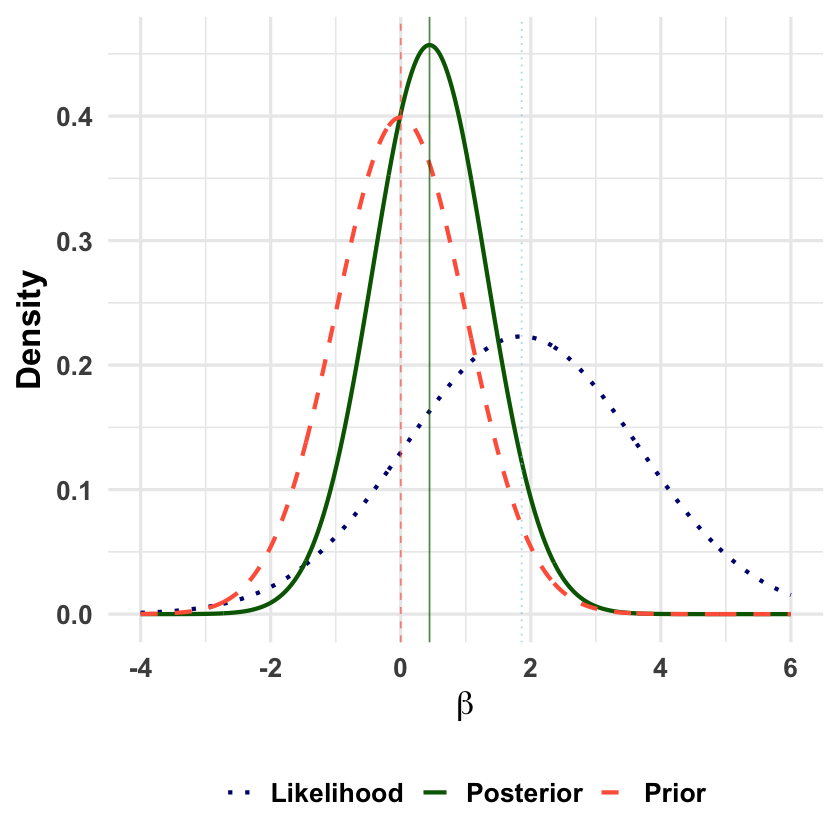

In [47]:
library(ggplot2)
library(dplyr)

# Set parameters
# Prior: N(mu_0, sigma_0^2)
mu_0 <- 0      # Prior mean
sigma_0 <- 1   # Prior standard deviation (smaller = more informative prior)

# Data (observed values)
y_obs <- c(1.2, 2.1, 1.8, 2.3, 1.9)  # Sample data
n <- length(y_obs)
y_bar <- mean(y_obs)  # Sample mean
sigma <- 4  # Known likelihood standard deviation (larger = less informative data)

# Calculate posterior parameters (conjugate normal-normal case)
# Posterior precision = prior precision + likelihood precision
tau_0 <- 1 / sigma_0^2    # Prior precision
tau_likelihood <- n / sigma^2  # Likelihood precision
tau_1 <- tau_0 + tau_likelihood  # Posterior precision

# Posterior parameters
sigma_1 <- sqrt(1 / tau_1)  # Posterior standard deviation
mu_1 <- (tau_0 * mu_0 + tau_likelihood * y_bar) / tau_1  # Posterior mean

# Create data for plotting
beta_range <- seq(-4, 6, length.out = 1000)

# Calculate densities
prior_density <- dnorm(beta_range, mu_0, sigma_0)
likelihood_density <- dnorm(beta_range, y_bar, sigma/sqrt(n))  # Likelihood as function of beta
posterior_density <- dnorm(beta_range, mu_1, sigma_1)

# Combine into data frame
plot_data <- data.frame(
  beta = rep(beta_range, 3),
  density = c(prior_density, likelihood_density, posterior_density),
  distribution = rep(c("Prior", "Likelihood", "Posterior"), each = length(beta_range))
)

# Create the plot
p <- ggplot(plot_data, aes(x = beta, y = density, color = distribution, linetype = distribution)) +
  geom_line(size = 1.2) +
  scale_color_manual(values = c("Prior" = "tomato", 
                               "Likelihood" = "#000080", 
                               "Posterior" = "darkgreen")) +
  scale_linetype_manual(values = c("Prior" = "dashed", 
                                  "Likelihood" = "dotted", 
                                  "Posterior" = "solid")) +
  labs(
    y = "Density",
    x = expression(beta),
    color = "Distribution",
    linetype = "Distribution"
  ) +
  theme_minimal(base_size = 20) +
  theme(
    plot.title = element_blank(),
    axis.title.y = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold"),
    axis.text.x = element_text(face = "bold"),
    axis.text.y = element_text(face = "bold"),
    legend.title = element_blank(),
    legend.text = element_text(face = "bold"),
    legend.position = "bottom"
  ) +
  guides(color = guide_legend(override.aes = list(size = 1.5)))

# Add vertical lines for means
p <- p + 
  geom_vline(xintercept = mu_0, color = "tomato", linetype = "dashed", alpha = 0.7) +
  geom_vline(xintercept = y_bar, color = "skyblue", linetype = "dotted", alpha = 0.7) +
  geom_vline(xintercept = mu_1, color = "darkgreen", linetype = "solid", alpha = 0.7)

# Display plot
print(p)

# Save plot to file
ggsave("./cartoons/Bayesian_normal_mean_model.png", plot = p,
       width = 10, height = 6, 
       bg = "transparent",
       dpi = 300)